In [23]:
!pip install scikit-fuzzy

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import skfuzzy as fuzz
import os

In [25]:
def initialize_membership_matrix(n, c):
    U = np.random.dirichlet(np.ones(c), size=n)
    return U

In [26]:
def update_centroids(X, U, m):
    # Compute the new centroids
    U_m = U ** m  # Raise the membership matrix to the power of m
    centroids = (U_m.T @ X) / np.sum(U_m.T, axis=1)[:, np.newaxis]
    return centroids

In [27]:
def update_membership_matrix(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))

    distance_matrix = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # Calculate the numerator: shape (n, c)
    numerator = distance_matrix

    # Compute the denominator for each point in X
    # Using broadcasting to compute the denominator efficiently
    denominator = np.sum((numerator[:, :, np.newaxis] / distance_matrix[:, np.newaxis, :]) ** (2 / (m - 1)), axis=2)

    # Compute U_new
    U_new = 1 / denominator


    return U_new

In [28]:
def fuzzy_cmeans(X, c, m=2, max_iter=100, error=1e-5):
    n = X.shape[0]  # Number of data points

    # Initialize the membership matrix randomly
    U = initialize_membership_matrix(n, c)

    # Main loop
    for _ in tqdm(range(max_iter)):
        # Update centroids
        centroids = update_centroids(X, U, m)

        # Update membership matrix
        U_new = update_membership_matrix(X, centroids, m)

        # Check for convergence
        if np.linalg.norm(U_new - U) < error:
            break

        U = U_new

    return centroids, U

In [29]:
def show_heatmaps(image, membership_matrix, imageName):
    """
    Saves heatmaps for each cluster overlaid on the original image into 'data/{imageName}' folder.

    Args:
        image: The original image.
        membership_matrix: The membership matrix from Fuzzy C-means.
        imageName: The name of the image used for creating a directory to save the heatmaps.
    """
    c = membership_matrix.shape[1]  # Number of clusters

    # Normalize the membership matrix
    normalized_membership = membership_matrix / np.sum(membership_matrix, axis=1, keepdims=True)

    # Create the directory if it doesn't exist
    save_dir = f"data/{imageName}"
    os.makedirs(save_dir, exist_ok=True)

    for cluster in range(c):
        # Compute the heatmap for the current cluster
        heatmap = normalized_membership[:, cluster].reshape(image.shape[:2])

        # Apply a colormap (e.g., 'jet') to the heatmap
        heatmap_colored = plt.cm.jet(heatmap)[:, :, :3]  # Get RGB values from colormap

        # Create the plot
        plt.figure(figsize=(10, 5))
        plt.imshow(image)  # Display the original image
        plt.imshow(heatmap_colored, alpha=0.5)  # Overlay the heatmap with transparency
        plt.title(f"Cluster {cluster + 1}")
        plt.axis('off')

        # Save the plot as an image in the specified folder
        file_path = os.path.join(save_dir, f"cluster_{cluster + 1}.png")
        plt.savefig(file_path, bbox_inches='tight', pad_inches=0)
        plt.close()  # Close the figure to avoid memory issues

    print(f"Heatmaps saved in {save_dir}")

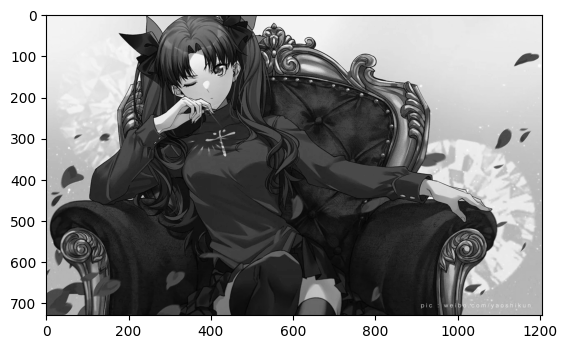

In [30]:
img = cv2.imread('/content/rin.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [31]:
img_flat = img.reshape((-1, 1))

In [32]:
# Apply Fuzzy C-means
centroids, membership_matrix = fuzzy_cmeans(img_flat, c=3, m=2, max_iter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [33]:
# Show heatmap overlay
show_heatmaps(img, membership_matrix, 'rinGray')

Heatmaps saved in data/rinGray


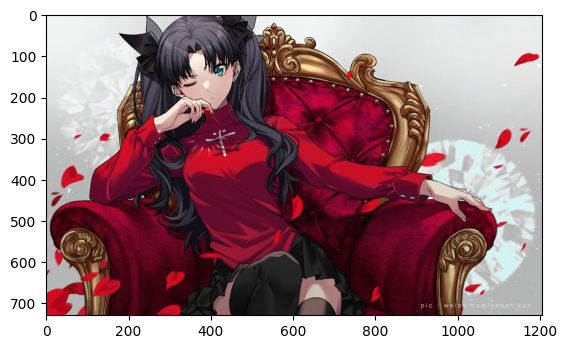

In [34]:
img = cv2.imread('/content/rin.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [35]:
img_flat = img.reshape((-1, 3))
# Apply Fuzzy C-means
centroids, membership_matrix = fuzzy_cmeans(img_flat, c=3, m=2, max_iter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [36]:
# Show heatmap overlay
show_heatmaps(img, membership_matrix, 'rinRGB')

Heatmaps saved in data/rinRGB


  0%|          | 0/1000 [00:00<?, ?it/s]

Heatmaps saved in data/milky-wayGray


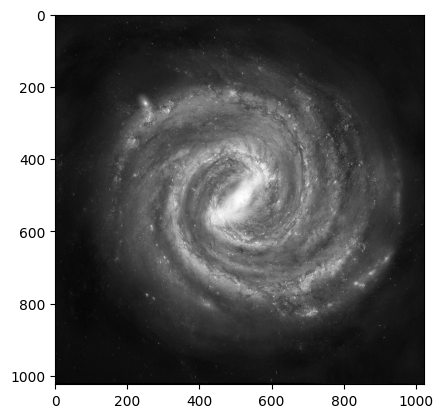

In [38]:
img = cv2.imread('/content/milky-way.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
img_flat = img.reshape((-1, 1))
# Apply Fuzzy C-means
centroids, membership_matrix = fuzzy_cmeans(img_flat, c=3, m=2, max_iter=1000)
# Show heatmap overlay
show_heatmaps(img, membership_matrix, 'milky-wayGray')

  0%|          | 0/1000 [00:00<?, ?it/s]

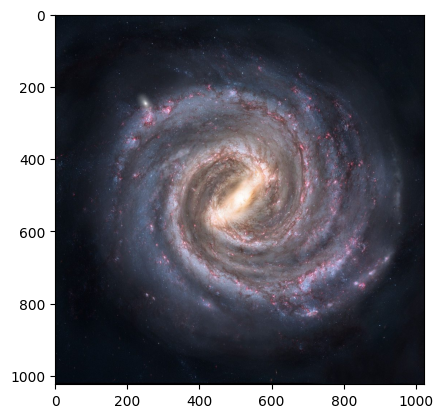

In [39]:
img = cv2.imread('/content/milky-way.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
img_flat = img.reshape((-1, 3))
# Apply Fuzzy C-means
centroids, membership_matrix = fuzzy_cmeans(img_flat, c=3, m=2, max_iter=1000)

In [40]:
# Show heatmap overlay
show_heatmaps(img, membership_matrix, 'milky-wayRGB')

Heatmaps saved in data/milky-wayRGB


  0%|          | 0/1000 [00:00<?, ?it/s]

Heatmaps saved in data/Anya


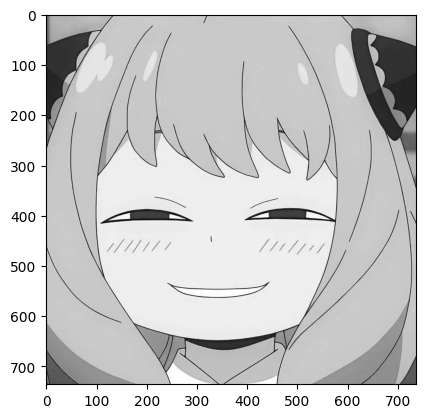

In [41]:
img = cv2.imread('/content/what-are-your-thoughts-on-spy-x-family-do-you-think-it-v0-xglhwsycb5mc1.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
img_flat = img.reshape((-1, 1))
# Apply Fuzzy C-means
centroids, membership_matrix = fuzzy_cmeans(img_flat, c=10, m=2, max_iter=1000)
# Show heatmap overlay
show_heatmaps(img, membership_matrix, 'Anya')

  0%|          | 0/1000 [00:00<?, ?it/s]

Heatmaps saved in data/AnyaGray


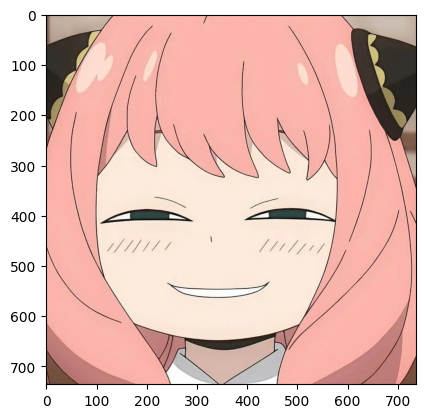

In [42]:
img = cv2.imread('/content/what-are-your-thoughts-on-spy-x-family-do-you-think-it-v0-xglhwsycb5mc1.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
img_flat = img.reshape((-1, 3))
# Apply Fuzzy C-means
centroids, membership_matrix = fuzzy_cmeans(img_flat, c=10, m=2, max_iter=1000)
# Show heatmap overlay
show_heatmaps(img, membership_matrix, 'AnyaGray')

# Library

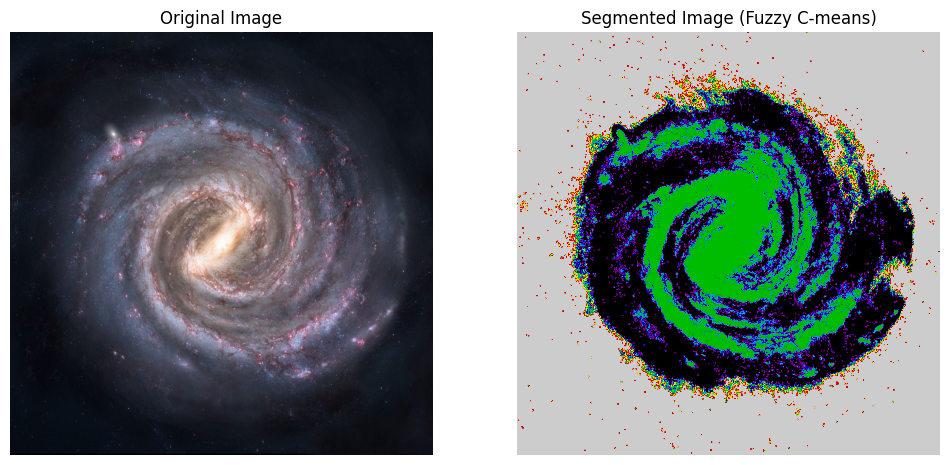

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import cv2

# Function to apply Fuzzy C-means clustering to an image
def fuzzy_c_means(image_path, n_clusters=3):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img_flat = image.reshape((-1, 3)).astype(np.float32)  # Flatten the image

    # Define the fuzzy c-means algorithm
    # Perform FCM clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        img_flat.T, n_clusters, 2, error=0.005, maxiter=1000
    )
    # Assign pixels to the cluster with the highest membership
    cluster_labels = np.argmax(u, axis=0)

    # Reshape the cluster labels to the original image shape
    segmented_image = cluster_labels.reshape(image.shape[:-1])

    # Display the original and segmented images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Segmented Image (Fuzzy C-means)')
    plt.imshow(segmented_image, cmap='nipy_spectral')  # Use colormap for better visualization
    plt.axis('off')

    plt.show()

# Example usage
fuzzy_c_means('/content/milky-way.jpg', n_clusters=3)

In [44]:
!zip -r Fuzzy_Data.zip /content/data/

  adding: content/data/ (stored 0%)
  adding: content/data/rin/ (stored 0%)
  adding: content/data/rin/cluster_2.png (deflated 0%)
  adding: content/data/rin/cluster_1.png (deflated 0%)
  adding: content/data/rin/cluster_3.png (deflated 0%)
  adding: content/data/AnyaGray/ (stored 0%)
  adding: content/data/AnyaGray/cluster_2.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_6.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_1.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_4.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_7.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_9.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_8.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_5.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_3.png (deflated 0%)
  adding: content/data/AnyaGray/cluster_10.png (deflated 0%)
  adding: content/data/rinGray/ (stored 0%)
  adding: content/data/rinGray/cluster_2.png (deflated 0%)
  adding: 